In [1]:
import numpy as np
import pyflux as pf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read CSV file of Bitcoin End of Day (EOD) prices
# Note that EOD prices were extracted from intraday prices in another process

df = pd.read_csv("C:/Users/geral/Desktop/EOD_Bitcoin.csv") 
df.head()

,Transaction_Date,EOD_Timestamp,Record Count,price,quantity
0,2011-09-13,2011-09-13 19:34:36.000,1,5.97,4.446800
1,2011-09-14,2011-09-14 15:42:31.000,1,5.53,0.782450
2,2011-09-15,2011-09-15 15:11:22.000,1,5.13,5.438650
3,2011-09-16,2011-09-16 16:13:02.000,1,4.85,5.139461
4,2011-09-17,2011-09-17 15:32:08.000,1,4.87,0.300000


In [3]:
# Pull out the Price along with Log transformation of Price and the Log Returns

df.drop(['EOD_Timestamp',  'Record Count',  'quantity'],  axis=1,  inplace=True) 

df = df.rename(columns = {"Transaction_Date":"timestamp", 
                          "price":"close"}) 

df['timestamp']  =  pd.to_datetime(df['timestamp'])
df  =  df.set_index(['timestamp'],  drop=True) 

df['log close'] = np.log(df['close'])
df['log return'] = np.log(df['close']).diff()

df = df[1:]

df.head(10)

,close,log close,log return
timestamp,,,
2011-09-14,5.530000,1.710188,-0.076559
2011-09-15,5.130000,1.635106,-0.075082
2011-09-16,4.850000,1.578979,-0.056127
2011-09-17,4.870000,1.583094,0.004115
2011-09-18,4.920000,1.593309,0.010215
2011-09-19,4.900000,1.589235,-0.004073
2011-09-20,5.660000,1.733424,0.144189
2011-09-21,5.712735,1.742698,0.009274
2011-09-22,5.720000,1.743969,0.001271


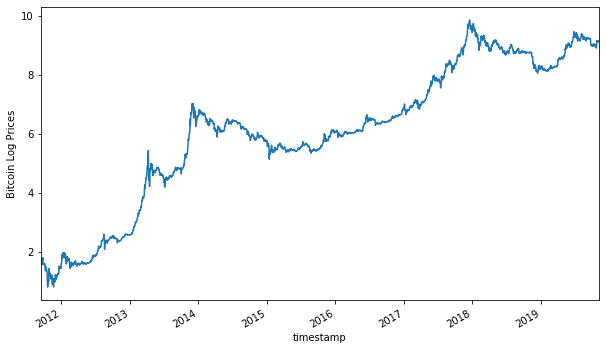

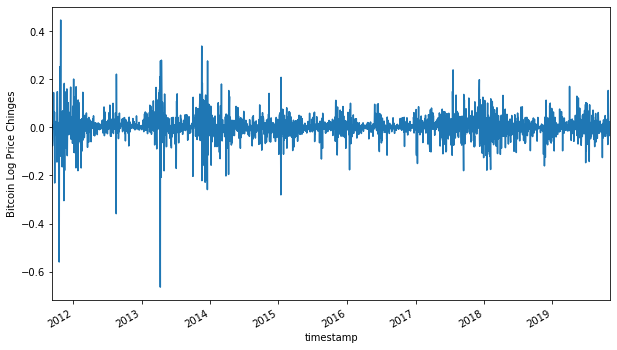

In [4]:
# Plot Log prices

plt.figure(figsize=(10,  6)) 
plt.ylabel("Bitcoin Log Prices")
df['log close'].plot()

plt.figure(figsize=(10,  6)) 
plt.ylabel("Bitcoin Log Price Chinges")
df['log return'].plot()

In [5]:
# Descriptive Statistics for Log Prices

print("Log Prices\n")
print("Mean     ",df['log close'].mean())
print("Median   ",df['log close'].median())
print("Skewness ",df['log close'].skew())
print("Kurtosis ",df['log close'].kurt())

print("\nLog Price Differences\n")
print("Mean     ",df['log return'].mean())
print("Median   ",df['log return'].median())
print("Skewness ",df['log return'].skew())
print("Kurtosis ",df['log return'].kurt())

Log Prices

Mean      6.101435555486407
Median    6.238676125755892
Skewness  -0.5232480788213172
Kurtosis  -0.5725296114372869

Log Price Differences

Mean      0.002490337456614929
Median    0.0020020026706728533
Skewness  -1.2457321616430832
Kurtosis  23.806023897715292


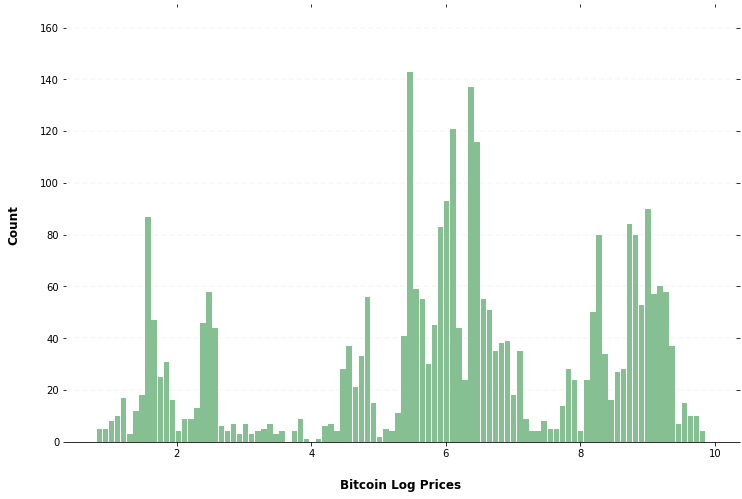

In [6]:
# Print Distribution of Log Prices

ax = df.hist(column='log close', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Bitcoin Log Prices", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

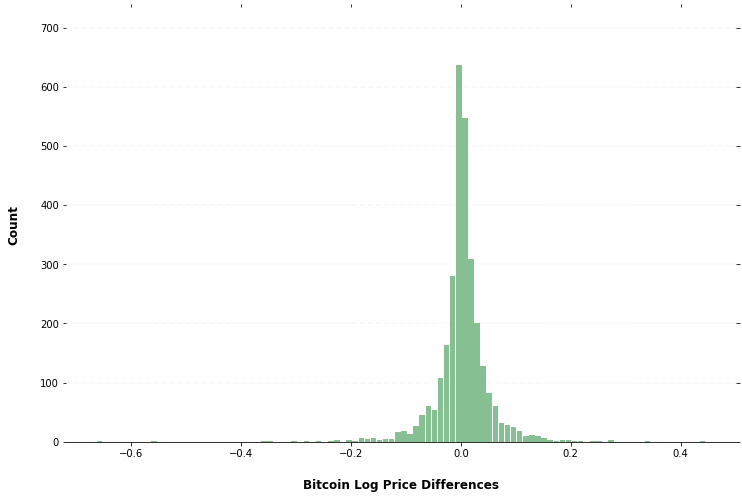

In [7]:
# Print Distribution of Log Prices

ax = df.hist(column='log return', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Bitcoin Log Price Differences", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

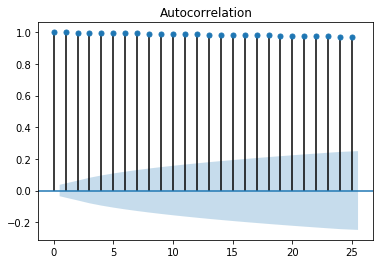

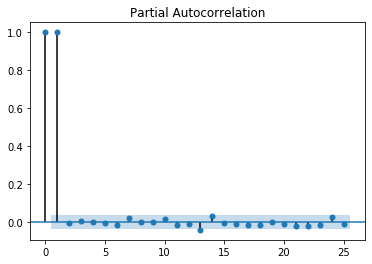

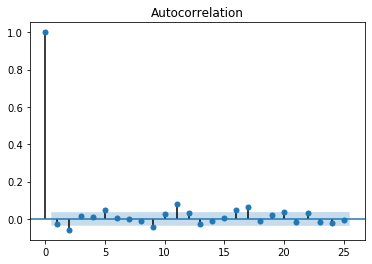

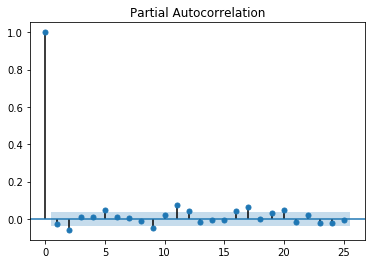

In [8]:
# Plot Autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['log close'], lags = 25)
pass
plot_pacf(df['log close'], lags = 25)
pass

plot_acf(df['log return'], lags = 25)
pass
plot_pacf(df['log return'], lags = 25)
pass

In [9]:
# Print Dickey-Fuller test results for Stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('\nResults of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df['log close'])
adf_test(df['log return'])


Results of Dickey-Fuller Test:
Test Statistic                   -1.518143
p-value                           0.524518
#Lags Used                       20.000000
Number of Observations Used    2934.000000
Critical Value (1%)              -3.432581
Critical Value (5%)              -2.862526
Critical Value (10%)             -2.567295
dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                -9.817200e+00
p-value                        5.457603e-17
#Lags Used                     1.900000e+01
Number of Observations Used    2.935000e+03
Critical Value (1%)           -3.432580e+00
Critical Value (5%)           -2.862525e+00
Critical Value (10%)          -2.567294e+00
dtype: float64


In [10]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('\nResults of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(df['log close'])
kpss_test(df['log return'])


Results of KPSS Test:
Test Statistic            8.73742
p-value                   0.01000
Lags Used                28.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64

Results of KPSS Test:
Test Statistic            0.134595
p-value                   0.100000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\geral\Anaconda3\envs\Time_Series\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\geral\Anaconda3\envs\Time_Series\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [11]:
#set LogPrice dataset

logprice = df
logprice.drop(['close',  'log return'],  axis=1,  inplace=True) 

logprice.head(10)

,log close
timestamp,
2011-09-14,1.710188
2011-09-15,1.635106
2011-09-16,1.578979
2011-09-17,1.583094
2011-09-18,1.593309
2011-09-19,1.589235
2011-09-20,1.733424
2011-09-21,1.742698
2011-09-22,1.743969


In [12]:
# Define GAS Model (Gaussian)

GASmodel = pf.GAS(ar=1, sc=3, data=logprice, family=pf.Normal())
GASfit = GASmodel.fit("MLE")
GASfit.summary()

NormalGAS (1,0,3)                                                                                         
======================================================= ==================================================
Dependent Variable: log close                           Method: MLE                                       
Start Date: 2011-09-17 00:00:00                         Log Likelihood: 4639.1563                         
End Date: 2019-11-06 00:00:00                           AIC: -9266.3126                                   
Number of observations: 2952                            BIC: -9230.3711                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 -0.0005    0.0        -54.8125 0.0      (-0.0005 | -0.0005)      
AR(1)                                

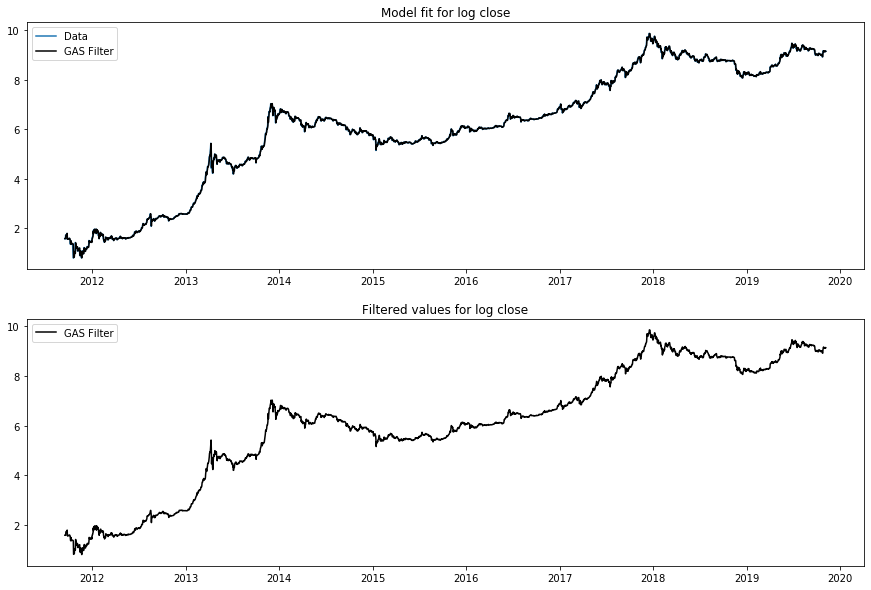

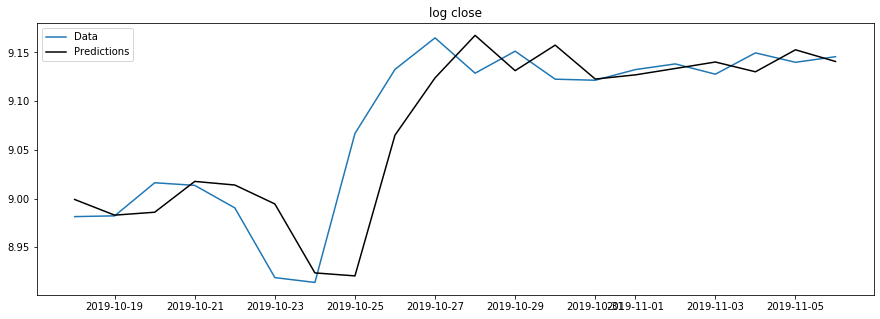

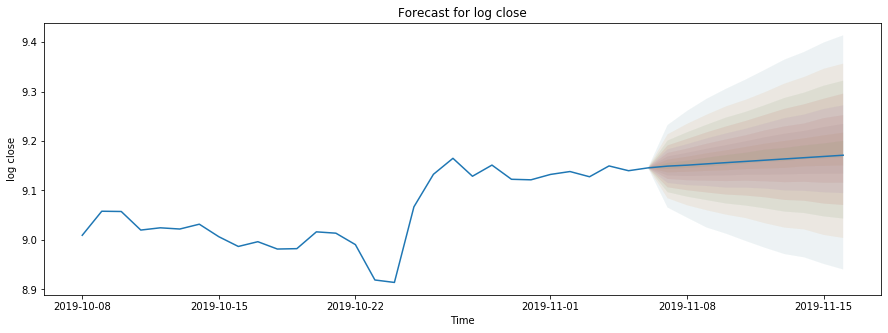

In [13]:
# Plot predictions

GASmodel.plot_fit(figsize=(15,10))
GASmodel.plot_predict_is(h=20, fit_once=True, figsize=(15,5))
GASmodel.plot_predict(h=10, past_values=30, figsize=(15,5))

In [14]:
# Fit Arima Model using MLE
ARIMAmodel = pf.ARIMA(data=logprice, ar=1, ma=15, family=pf.Normal())
ARIMAfit = ARIMAmodel.fit('MLE')
print(ARIMAfit.summary())

Normal ARIMA(1,0,15)                                                                                      
======================================================= ==================================================
Dependent Variable: log close                           Method: MLE                                       
Start Date: 2011-09-29 00:00:00                         Log Likelihood: -1678.7129                        
End Date: 2019-11-06 00:00:00                           AIC: 3393.4259                                    
Number of observations: 2940                            BIC: 3501.1768                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 3.5854     0.0759     47.265   0.0      (3.4367 | 3.7341)        
AR(1)                                

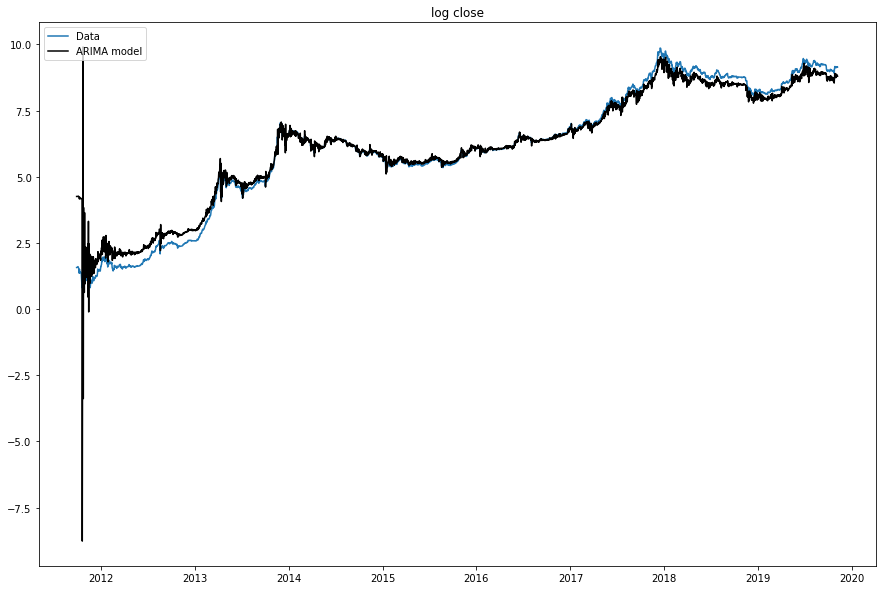

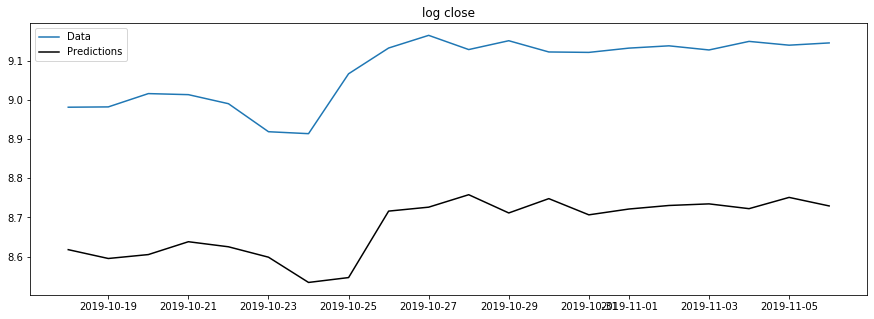

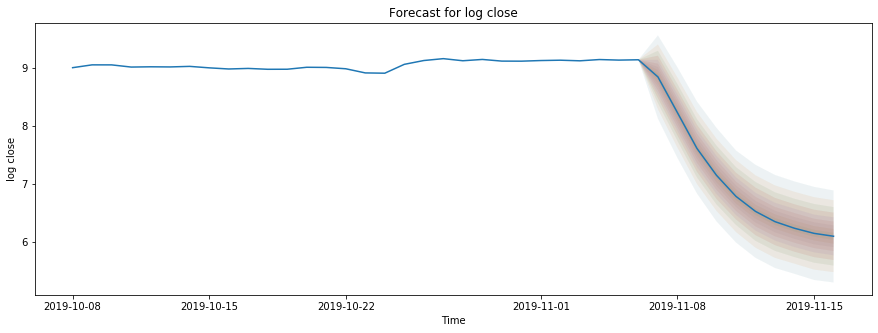

In [15]:
# Plot predictions

ARIMAmodel.plot_fit(figsize=(15,10))
ARIMAmodel.plot_predict_is(h=20, fit_once=True, figsize=(15,5))
ARIMAmodel.plot_predict(h=10, past_values=30, figsize=(15,5))

In [16]:
# Extract out Fitted values

ARIMAfitted = np.array(ARIMAmodel.fit('MLE').signal)
ARIMAindex  = ARIMAmodel.fit('MLE').index
ARIMAdata = pd.DataFrame(ARIMAfitted, index=ARIMAindex[:2940])
print(ARIMAdata.head(10))

GASfitted = np.array(GASmodel.fit('MLE').signal)
GASindex  = GASmodel.fit('MLE').index
GASdata = pd.DataFrame(GASfitted[:2940], index=GASindex[:2940])
print(GASdata.head(10))

                   0
timestamp           
2011-09-14  4.255689
2011-09-15  4.255689
2011-09-16  4.260087
2011-09-17  4.269606
2011-09-18  4.264440
2011-09-19  4.253917
2011-09-20  4.236704
2011-09-21  4.175148
2011-09-22  4.164331
2011-09-23  4.227351
                   0
timestamp           
2011-09-14  1.590942
2011-09-15  1.590942
2011-09-16  1.590942
2011-09-17  1.588727
2011-09-18  1.731526
2011-09-19  1.730398
2011-09-20  1.749067
2011-09-21  1.743439
2011-09-22  1.738105
2011-09-23  1.799515


In [17]:
ARIMAresid = pd.merge(ARIMAdata, logprice, on='timestamp')
ARIMAresid.columns =['fit', 'actual']
ARIMArmse = np.sqrt(((ARIMAresid['fit'] - ARIMAresid['actual']) ** 2).mean())
print("ARIMA RSME: ",ARIMArmse)

GASresid = pd.merge(GASdata, logprice, on='timestamp')
GASresid.columns =['fit', 'actual']
GASrmse = np.sqrt(((GASresid['fit'] - GASresid['actual']) ** 2).mean())
print("GAS RSME:   ",GASrmse)

ARIMA RSME:  0.4702638086549477
GAS RSME:    0.06701265896460239


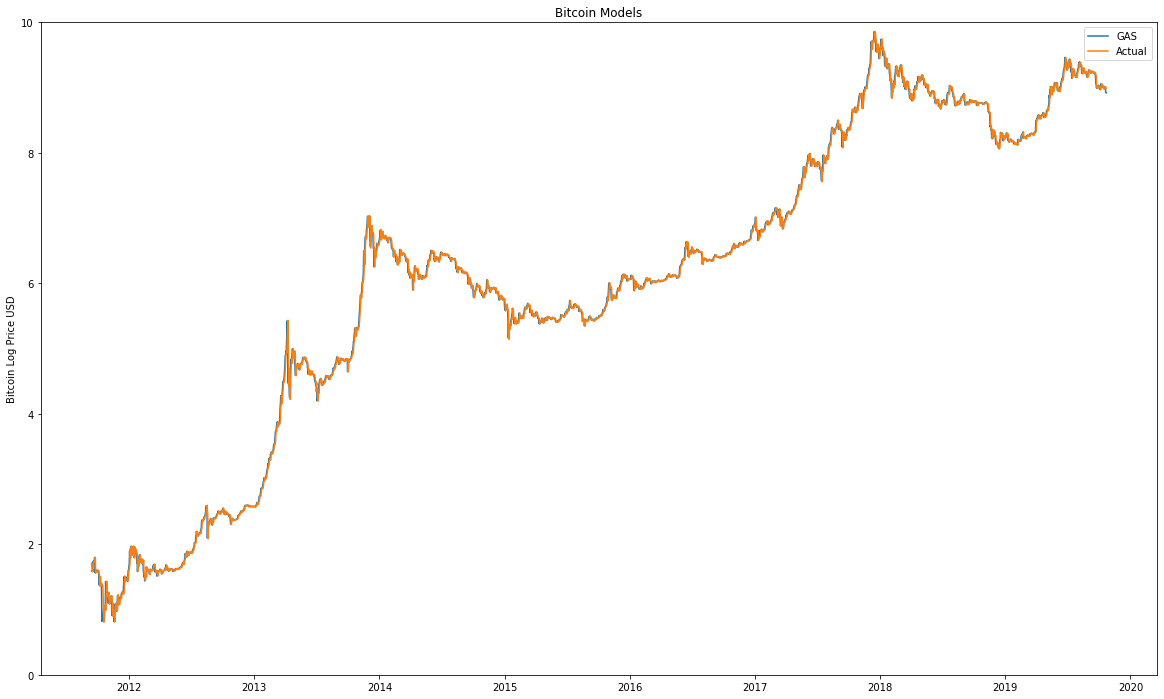

In [19]:
### 

plt.figure(figsize=(20,12))
plt.title("Bitcoin Models")
plt.ylabel("Bitcoin Log Price USD")
plt.plot(GASdata, label='GAS')
plt.plot(logprice[:2940], label='Actual')
plt.ylim(-0.0,10.0)
plt.plot()
plt.legend()

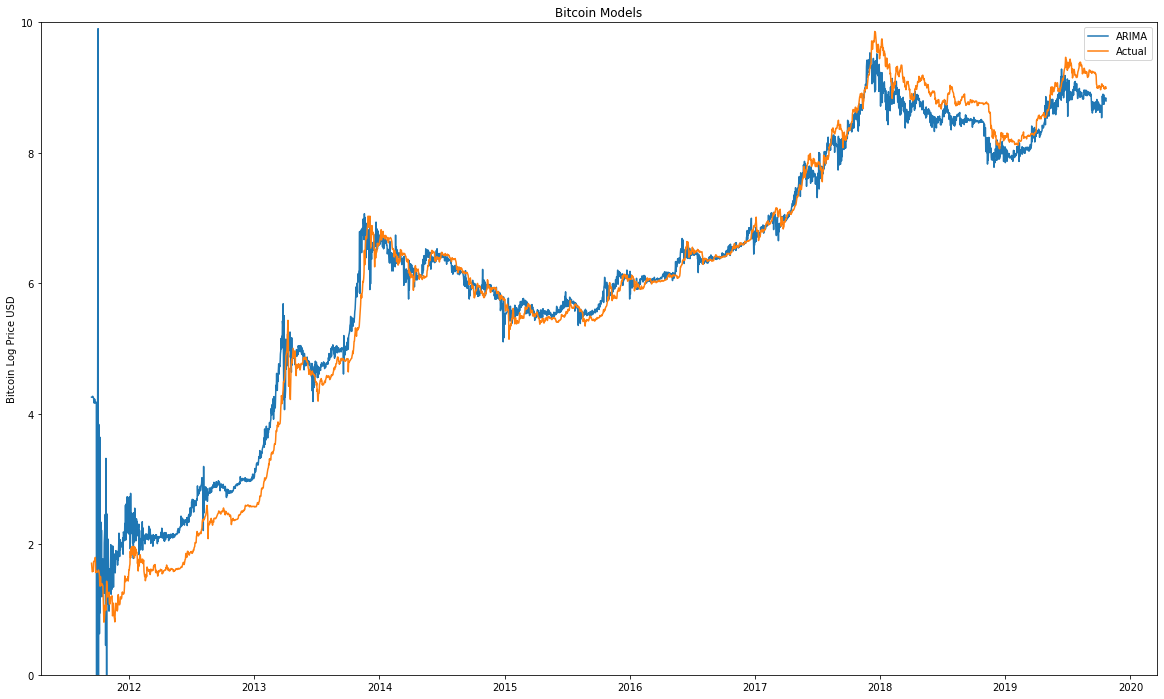

In [20]:
### 

plt.figure(figsize=(20,12))
plt.title("Bitcoin Models")
plt.ylabel("Bitcoin Log Price USD")
plt.plot(ARIMAdata, label='ARIMA')
plt.plot(logprice[:2940], label='Actual')
plt.ylim(-0.0,10.0)
plt.plot()
plt.legend()